<a href="https://colab.research.google.com/github/chakshumw/Clustering_Practice_Country_Cluster/blob/main/Country_Cluster_with_Categorical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basics of Cluster

###Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

###Load the data

In [2]:
data = pd.read_csv('/content/Country clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


###Map the data

In [14]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


###Select the **features**

In [15]:
x = data_mapped.iloc[:,3:4]

In [16]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


###Clustering

In [8]:
kmeans  = KMeans(3)

In [17]:
kmeans.fit(x)

KMeans(n_clusters=3)

###Clustering Results

In [19]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 0, 2, 0], dtype=int32)

In [21]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,0


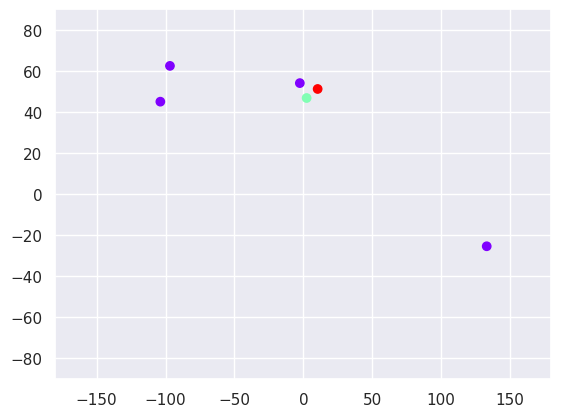

In [22]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()